## Импортируем нужные библиотеки

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

## Создаем и визуализируем данные

In [5]:
eta=1
# feature
X  = np.random.rand(100,1)
# target
Y = 2 + 3*X + eta*np.random.rand(100,1)

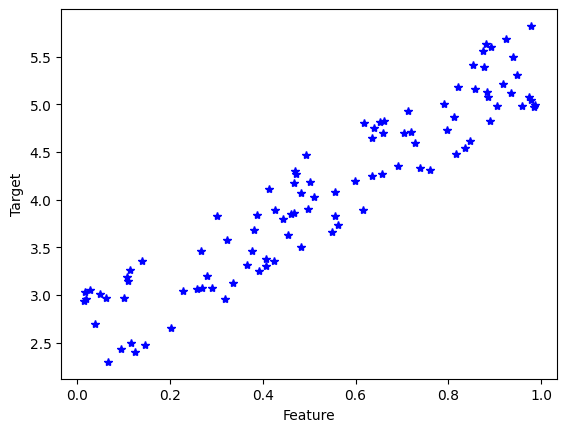

In [6]:
plt.plot(X,Y,'*b')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Рассчитаем коэффициенты линейной регрессии и предскажем таргеты

In [7]:
X_with_ones = np.concatenate((np.ones((100,1)), X), 1)

In [8]:
theta = np.linalg.pinv(X_with_ones).dot(Y)

In [9]:
theta

array([[2.54700417],
       [2.86943128]])

In [10]:
Y_pred = X_with_ones.dot(theta)

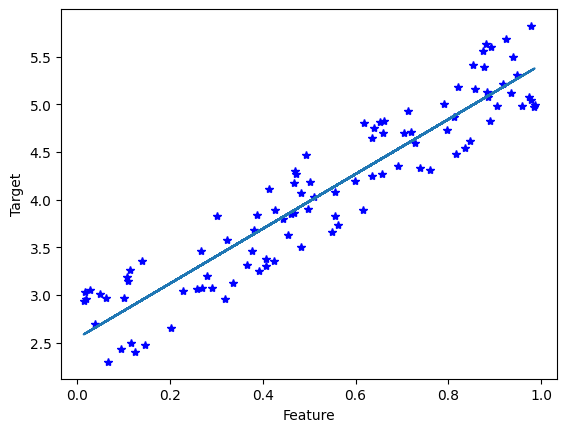

In [11]:
plt.plot(X,Y,'*b')
plt.plot(X,Y_pred)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Сделаем то же самое с помощью библиотеки sklearn

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
lr = LinearRegression()

In [12]:
lr.fit(X, Y)

LinearRegression()

In [13]:
Y_pred_sklearn = lr.predict(X)

In [14]:
lr.intercept_, lr.coef_

(array([2.54700417]), array([[2.86943128]]))

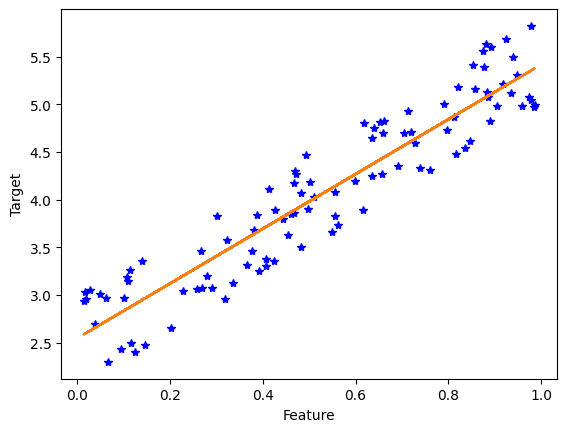

In [15]:
plt.plot(X,Y,'*b')
plt.plot(X,Y_pred)
plt.plot(X,Y_pred_sklearn)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Модель для задачи с несколькими признаками

In [16]:
eta=1
# feature
X  = np.random.rand(100,4)
# target
Y = np.reshape(2 + 3*X[:,0] + 4*X[:,1] + 5*X[:,2] + 6*X[:,3],(100,1)) + eta*np.random.rand(100,1)

In [17]:
Y

array([[ 6.868085  ],
       [14.49661227],
       [11.33163481],
       [14.54719529],
       [14.30496296],
       [11.00375188],
       [10.4326125 ],
       [13.91450347],
       [ 8.20218485],
       [ 8.12495302],
       [12.30764446],
       [12.10221312],
       [ 6.78740963],
       [12.32599263],
       [11.79987485],
       [ 9.73588239],
       [12.53568463],
       [ 5.05636937],
       [11.08754093],
       [13.2866465 ],
       [11.4084802 ],
       [12.82916503],
       [10.887056  ],
       [ 9.96052679],
       [13.76212436],
       [ 7.57836828],
       [11.91631537],
       [ 6.91463366],
       [13.42380877],
       [11.08824607],
       [11.44821448],
       [ 7.46050242],
       [13.92321691],
       [ 7.20271213],
       [13.10539262],
       [ 9.64608809],
       [15.154643  ],
       [12.25858861],
       [16.35179274],
       [ 8.32705023],
       [12.00851736],
       [10.8438522 ],
       [12.63846672],
       [12.52612841],
       [ 7.12479913],
       [15

In [18]:
Y.shape

(100, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.intercept_, lr.coef_

(array([2.25245368]),
 array([[3.12872866, 4.15062353, 4.88516867, 6.20328138]]))

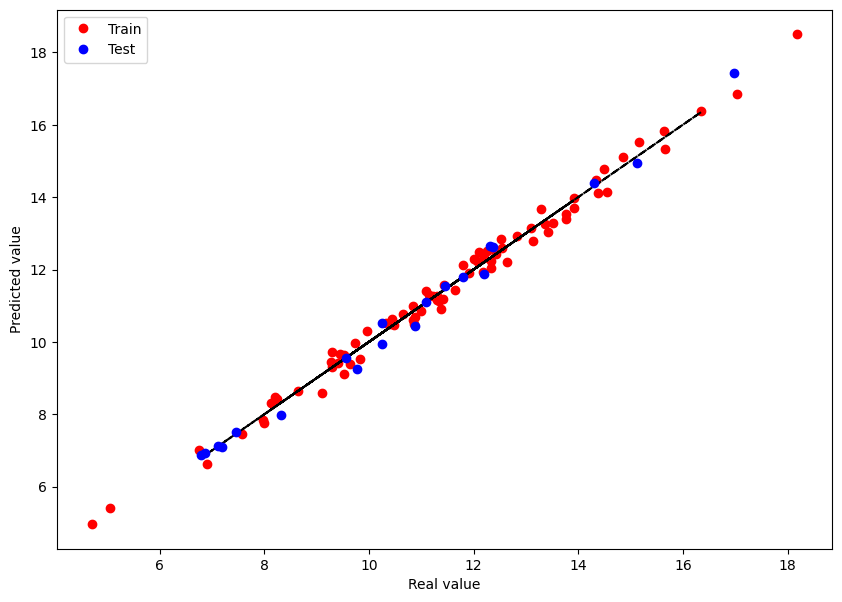

In [22]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, lr.predict(X_train), 'or', label='Train')
plt.plot(y_train[::3], y_train[::3], '--k')
plt.plot(y_test, lr.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

## Расчет метрики ошибки

In [23]:
from sklearn.metrics import mean_squared_error as mse

In [24]:
mse(y_test, lr.predict(X_test), squared=False)

0.2550820087838192

In [25]:
np.sqrt(mse(y_test, lr.predict(X_test)))

0.2550820087838192

## Домашнее задание:

Обучить линейную регрессию, построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок) для датасета сталей и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('Steels_kaggle.csv')

In [28]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [29]:
df.shape

(915, 20)

In [30]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [34]:
df.columns[1:16]

Index([' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al',
       ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)'],
      dtype='object')

In [36]:
df[df.columns[1:16]].head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400


In [45]:
X = df[df.columns[1:16]].to_numpy()

In [46]:
X.shape

(915, 15)

In [39]:
Y = df[[' 0.2% Proof Stress (MPa)']].to_numpy()

In [42]:
Y.shape

(915, 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
lr.intercept_, lr.coef_

(array([259.75835764]),
 array([[ 1.04240999e+02,  1.20165250e+02,  4.34634715e+01,
         -8.46820203e+02, -5.01306349e+02,  1.08736701e+02,
          3.94891231e+00,  1.26345813e+02,  1.25544934e+01,
          4.79968698e+02,  4.97018409e+02, -2.70951930e+03,
          2.87410462e+02,  4.81200853e+04, -3.44244768e-01]]))

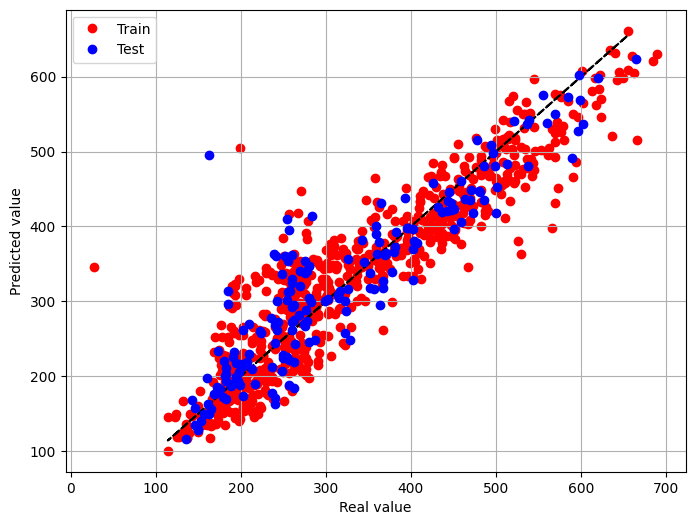

In [53]:
plt.figure(figsize=(8,6))
plt.grid()

plt.plot(y_train, lr.predict(X_train), 'or', label='Train', zorder=1)
plt.plot(y_train[::3], y_train[::3], '--k', zorder=2)
plt.plot(y_test, lr.predict(X_test), 'ob', label='Test', zorder=3)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

### MSE

In [54]:
mse(y_test, lr.predict(X_test), squared=False)

52.61456715037983

In [74]:
X_pred = df.iloc[0][1:16].to_numpy()

In [75]:
X_pred[-1] = 100

In [76]:
X_pred = X_pred.reshape((1, X_pred.shape[0]))

In [77]:
lr.predict(X_pred)

array([[369.26735998]])